https://www.youtube.com/watch?v=VMj-3S1tku0

- Autograd: automatic gradient (implements backpropegation)
- backpropegation is an algorithm that you to effeciently evaluate the gradient of some loss function with respect to the weights of a neural network. That allows us to iteratively tune the weights and reduce the loss of the loss function
    - back propagation allows us to recursively apply the chain rule from calculus. 


In [1]:
import torch

# Define the variable x and indicate that we need its gradient
x = torch.tensor([2.0], requires_grad=True)

# Define the expression x^2
y = x ** 2

# Perform the backward pass to compute the gradient
y.backward()

# The gradient is stored in x.grad
x_grad = x.grad

x_grad.item()  # Displaying the gradient value



4.0

In [8]:
import sympy as sp

# Define a symbolic variable
x = sp.symbols('x')
y = sp.symbols('y')

# Define a function
f = x**2 + 3*x + 5 + 2*y

# Compute the derivative
d_f = sp.diff(f, x)

print(d_f)

2*x + 3


In [19]:
f.evalf(subs={'x': 1, 'y': 2}) * 2

26.0000000000000

In [20]:
d_f.evalf(subs={'x': 1, 'y': 2})

5.00000000000000

In [34]:
import sympy as sp

x = sp.symbols('x')
f = x**2 + 2*x

d_f = sp.diff(f, x)
print(d_f)

2*x + 2


In [35]:
import numpy as np

values = np.arange(-20, 21)
y = [f.evalf(subs={'x': x}) for x in values]
d_y = [d_f.evalf(subs={'x': x}) for x in values]

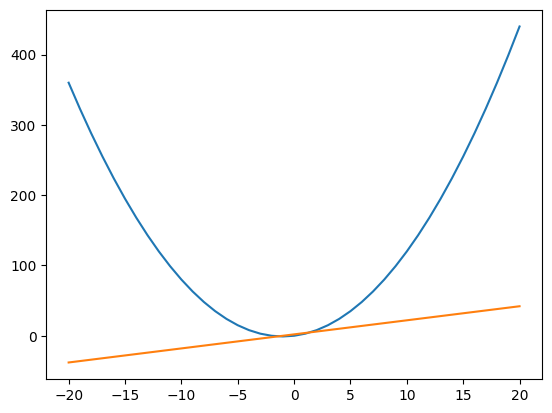

In [36]:
import matplotlib.pyplot as plt
plt.plot(values, y)
plt.plot(values, d_y)

In [38]:
# Solve derivative_f = 0
critical_points = sp.solve(d_f, x)
print(critical_points)

[-1]


In [39]:
import sympy as sp

# Define symbolic variables
x, y, z = sp.symbols('x y z')

# Define a function of x, y, z
f = x**2 + y**2 + z**2 + 3*x*y + 5*z

# Compute the partial derivatives
partial_derivative_x = sp.diff(f, x)
partial_derivative_y = sp.diff(f, y)
partial_derivative_z = sp.diff(f, z)

# Solve the system of equations
critical_points = sp.solve((partial_derivative_x, partial_derivative_y, partial_derivative_z), (x, y, z))

print(critical_points)


{x: 0, y: 0, z: -5/2}
